# **Bernstein-Vazirani Algorithm**
#### The Bernstein-Vazirani Algorithm is  a special case of Deutsci-Jozsa algorithm in which the oracle function $f(x) = a . x$ has a hidden string $a$ (composed of bits). The task of Bernstein-Vazirani algorithm is to determine the hidden string $a$ using just one query to the oracle, demonstrating a significant speedup compared to the classical approach. Classically, solving this problem requires making $n$ queries to the oracle, as each query would reveal one bit of the hidden string $a$. 

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

#### As mentioned, this algorithm is a special case of the Deutsch-Jozsa algorithm. Therefore, the steps of the algorithm follow similarly to the Deutsch-Jozsa algorithm.

## **Step 1:** Initialize the qubits
#### We prepare the initial state as the output qubit is in the $|1\rangle$ and the rest of the qubits, as input, are in state $|0\rangle$:
$$
|\phi_1\rangle =|1\rangle |0\rangle^{\otimes n} .
$$

## **Step 2:** Apply Hadamard gates
#### We apply the Hadamard gate to each qubit, putting all $n$ input qubits and one output qubit into a superposition of all possible states.
$$
|\phi_2\rangle = H|1\rangle \otimes \left(H^{\otimes n}|0\rangle^{\otimes n}\right)\nonumber\\
=\frac{1}{\sqrt{2^n}} \left( \frac{|0\rangle - |1\rangle}{\sqrt{2}} \right) \sum_{x =0}^{2^n-1} |x\rangle .
$$
#### where $x$ is an integer encoded in binary. For example, $x \in\{0,1,2,3\}$ for $n=2$ where in the binary basis they represent $\{0\rightarrow |00\rangle,1\rightarrow |01\rangle,2\rightarrow |10\rangle,3\rightarrow |11\rangle\}$ in big endian format.

## **Step 3:** Apply the oracle
#### The oracle is a black-box quantum function that implements the given function $f$. It applies a transformation based on the value of $f(x) = a . x$
$$
U_f|y,x\rangle = |y \oplus f(x), x\rangle
$$
#### where $x$ is the first $n$ qubit and also input of $f(x)$, $y$ is the output qubit and $\oplus$ is the $XOR$ operation. The oracle $U_f$ is applied to all the $n$-qubits with state $|x\rangle$
$$
|\phi_3\rangle = U_f|\phi_2\rangle \nonumber\\
= \frac{1}{\sqrt{2^n}} \left( \frac{|0\rangle - |1\rangle}{\sqrt{2}} \right) \sum_{x =0}^{2^n-1} (-1)^{a.x}|x\rangle .
$$

## **Step 4:** Apply Hadamard gates on the $n$-qubits input

#### After applying the oracle, we apply the Hadamard gate to all input qubits to bring them back from superposition. 
$$
|\phi_4\rangle = H^{\otimes n}|\phi_3\rangle \nonumber\\
= \frac{1}{2^n} \left( \frac{|0\rangle - |1\rangle}{\sqrt{2}} \right) \sum_{z\in \{0,1\}} \sum_{x \in \{0,1\}} (-1)^{a.x+x.z}|z\rangle .
$$
#### The summation $\sum_{x \in \{0,1\}} (-1)^{a.x + x.z}$ results 
- $2^n$ which leads to $|\phi_4|^2 = 1$ if $a = z$
- 0 due to symmetry if $a \neq z$  

#### Therefore, The probability of measuring the correct string $a$ is 1, while the probability of measuring any other string is 0. 
## **Step 5:** Measurement:

#### Finally, we measure the input $n$ qubits. The result of the measurement will give us the bit string $a$, which we were trying to find.

In [2]:
n = 3 # number of qubits
a = '110' 

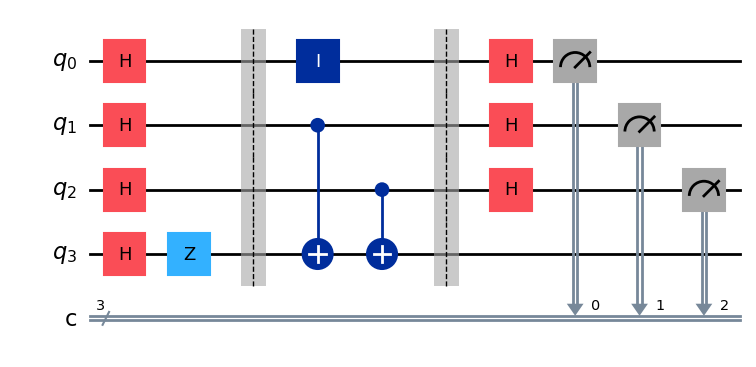

In [8]:
bv_circuit = QuantumCircuit(n+1, n)

# Step 1: initialise the state

# place target qubit in the |-> state in two ways
#1
#bv_ciruit.x(n)
#bv_ciruit.h(n)

#2
bv_circuit.h(n)
bv_circuit.z(n)

# Step 2: Aply Hadamard gates for all qubits
for i in range(n):
    bv_circuit.h(i)

bv_circuit.barrier()

# Step 3: Construct the oracle
a = a[::-1]# reverse c string, i.e. 011

for q in range(n):
    if a[q] == '0':
        bv_circuit.id(q)
    else:
        bv_circuit.cx(q,n)
bv_circuit.barrier()

# Step4: Apply Hadamard gates to the input qubits
for i in range(n):
    bv_circuit.h(i)

# Step 5: Measurement on all input qubits
for i in range(n):
    bv_circuit.measure(i,i)

bv_circuit.draw('mpl')




 Total counts are: {'110': 1000}


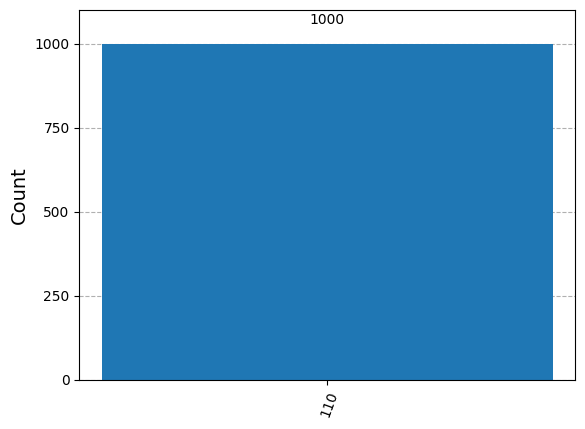

In [9]:
# initiate
estimator = Aer.get_backend('qasm_simulator')

#run
job = estimator.run(bv_circuit, shots = 1000)

# result
counts = job.result().get_counts(bv_circuit)

print("\n Total counts are:" , counts)

plot_histogram(counts)

#### This histogram confirms that all measurements on the input qubits correctly identify the string $a$.